# Exploratory data analysis

## Data
Files `intakes.csv` and `outcomes.csv` contain data from shelter in Austin, Texas USA. The data comes from the official [open data resources city of Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) contains data on animals admitted from 1. 10. 2013 to 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) contains data on animals that have left the shelter (e.g. adopted, returned to owner, etc.) during the same time interval. It may be that animals admitted before 1. 10. 2013 are not in `intakes.csv` (data has not been collected yet), but will have an entry in `outcomes.csv` if they left the shelter after that date.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
intakes = pd.read_csv('data/intakes.csv')
outcomes = pd.read_csv('data/outcomes.csv')

### Find out about DataFrame `intakes`

In [4]:
display(intakes.head())

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [5]:
display(intakes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Dataset `intakes` contains 12 features:
* Animal ID
* Name - name of animal
* DateTime - time the record was created (day, month, year and time)
* MonthYear - month and year when the record was created
* Found Location - place where the animal was found
* Intake Type - whether the animal is wild, stray, domestic
* Intake Condition - the condition in which the animal was admitted to the shelter
* Animal Type - what animal has been admitted to the shelter
* Sex upon Intake - information about the fertility of the animal, when it was admitted to the shelter
* Age upon Intake - age of the animal when it was admitted to the shelter
* Breed - animal breed
* Color - animal coloration

In [6]:
# detect missing values in the intakes dataset
intakes.isna().sum()

Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

1. The number of rows in the `intakes` dataset is *138 585*.
2. The data type of all features is object.
3. The number of missing values for the `Name` feature is *41 269*, for `Sex upon Intake` it is *1*.
4. Other features have no missing values.

In [7]:
# number of unique values, ignores NaNs by default
display(intakes.nunique())

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

### Find out about DataFrame `outcomes`

In [8]:
display(outcomes.head())

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [9]:
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Dataset `outcomes` contains 12 features:
* Animal ID
* Name - name of animal
* DateTime - time the record was created (day, month, year and time)
* MonthYear - month and year when the record was created
* Date of Birth - animal's birthday
* Outcome Type - the subsequent fate of the animal after the shelter
* Outcome Subtype - the condition in which the animal was released from the shelter
* Animal Type - what animal has been admitted to the shelter
* Sex upon Outcome - information about the fertility of the animal, when it was released from the shelter
* Age upon Outcome - age of the animal when it was released from the shelter
* Breed - animal breed
* Color - animal coloration

In [10]:
outcomes.isna().sum()

Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

1. The number of rows in the `outcomes` dataset is *138 769*.
2. The data type of all features is object.
3. The number of missing values for `Name` is *41 255*, for `Outcome Type` is *23*, for `Outcome Subtype` is *75 334*, for `Age upon Outcome` is *5*.
4. Other features have no missing values.

In [11]:
display(outcomes.nunique())

Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

## Data preparation

### Overwrite missing values in datasets to NaN

In [12]:
intakes = intakes.replace('Unknown', np.nan)
outcomes = outcomes.replace('Unknown', np.nan)

### Remove the `MonthYear` column
I keep the `DateTime` column because it contains information about the day and time the record was created in addition to the month and year information.

In [13]:
intakes = intakes.drop('MonthYear', axis=1)
outcomes = outcomes.drop('MonthYear', axis=1)

### Convert categorical features to type *category*

In [14]:
for col in ['Animal ID', 'Name', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color']:
    intakes[col] = intakes[col].astype('category')

In [15]:
for col in ['Animal ID','Name', 'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']:
    outcomes[col] = outcomes[col].astype('category')

### Convert the `Age upon Intake` and `Age upon Outcome` features to numeric

In [16]:
def age_to_years (v):
    if pd.isnull(v) or float(v.split(' ')[0]) <= 0:
        return np.nan
    elif v.split(' ')[1].startswith(('day','days')):
        return float('{:.2f}'.format(float(v.split(' ')[0]) / 365))
    elif v.split(' ')[1].startswith(('week', 'weeks')):
        return float('{:.2f}'.format(float(v.split(' ')[0]) / 52))
    elif v.split(' ')[1].startswith(('month', 'months')):
        return float('{:.2f}'.format(float(v.split(' ')[0]) / 12))
    elif v.split(' ')[1].startswith(('year', 'years')):
        return float('{:.2f}'.format(float(v.split(' ')[0])))

In [17]:
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(age_to_years)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(age_to_years)

### Convert the `DateTime` feature to the ***datetime64*** type

In [18]:
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'])
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'])

/var/folders/3f/31wd061j4kvc_mzd3wfvw8c00000gn/T/ipykernel_3496/723161935.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intakes['DateTime'] = pd.to_datetime(intakes['DateTime'])
/var/folders/3f/31wd061j4kvc_mzd3wfvw8c00000gn/T/ipykernel_3496/723161935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'])


### Convert the `Date of Birth` feature to a numeric

In [19]:
outcomes['Date of Birth'] = pd.to_datetime(outcomes['Date of Birth'])

###  Remove duplicate data in datasets

In [20]:
intakes = intakes.drop_duplicates()
outcomes = outcomes.drop_duplicates()

## Univariate descriptive statistics

* I'll describe the `Age upon Intake` feature from the **intakes** dataset using univariate descriptive statistics.

In [21]:
# univariate descriptive statistics for continuous data
def univariate_cont(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()],
        ["Maximal value", df[column].max()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Variance", df[column].var()]
    ]), columns=['Title', 'Value'])

    display(stats_df)

    # initializing the image layout
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :])
    ax2 = fig.add_subplot(spec[1, 0])
    ax3 = fig.add_subplot(spec[1, 1])
    sns.histplot(data=df, bins = 20, x=column, kde=True, ax=ax1)

    # x and y - graf rotation
    sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "red"})
    sns.violinplot(data=df, y=column, ax=ax3)

,Title,Value
0,Minimal value,0.0
1,Maximal value,30.0
2,Range,30.0
3,Average,2.0423293721126186
4,Median,1.0
5,Variance,8.192789187068607


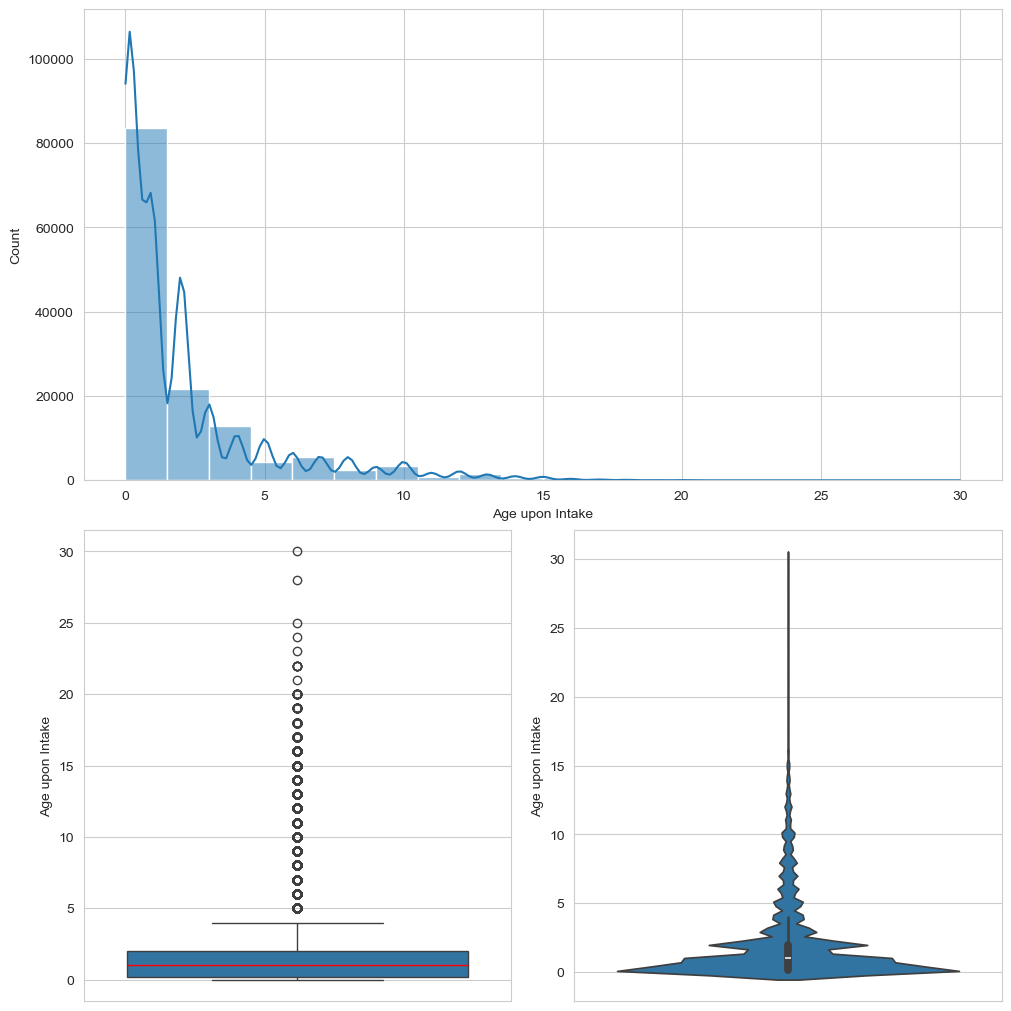

In [22]:
univariate_cont(intakes, 'Age upon Intake')

The graphs show that the age of animals admitted to the shelter is in most cases between one and two years.
Subsequently, the number of animals admitted to the shelter decreases as they get older.

* I'll describe the `DateTime` feature from the **intakes** dataset using univariate descriptive statistics.

In [23]:
# univariate descriptive statistics for continuous data
def univariate_cont_datetime(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()],
        ["Maximal value", df[column].max()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()]
    ]), columns=['Title', 'Value'])

    display(stats_df)

    # initializing the image layout
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :])

    sns.histplot(data=df, x=column, kde=True, ax=ax1)

,Title,Value
0,Minimal value,2013-10-01 07:51:00
1,Maximal value,2022-04-27 07:54:00
2,Range,3130 days 00:03:00
3,Average,2017-09-03 04:33:46.595749120
4,Median,2017-07-20 16:44:00


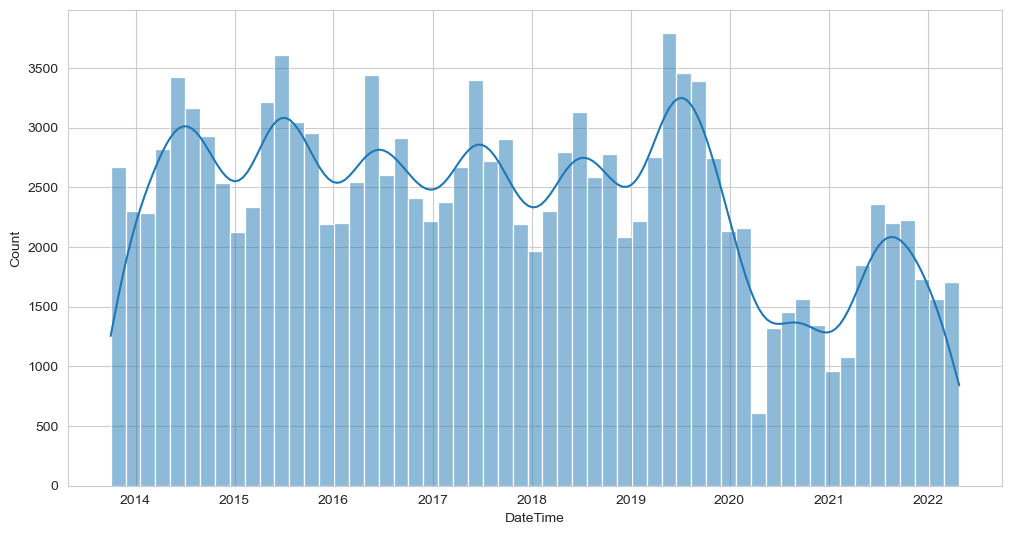

In [24]:
univariate_cont_datetime(intakes, 'DateTime')

The first entry is dated 1 October 2013 and the last entry is dated 27 April 2022.

The chart shows that in the autumn of 2019, the shelter received the most animals.
There is also a general trend - every summer the number of animals admitted to the shelter increases.
From 2020 to 2021 there was a decrease in the number of animals admitted to the shelter, but then by 2022 the number of animals admitted began to increase again.

###  Selected three features `Intake Type`, `Animal Type` and `Sex upon Intake` 
* will be described using univariate descriptive statistics that are appropriate for them.

In [25]:
# univariate descriptive statistics for categorical data
def univariate_cat(df, column):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })

    display(stats_df)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

    sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
    # adds labels above the bars
    ax1.bar_label(ax1.containers[0])
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')

,Frequency,Relative frequency
Intake Type,,
Stray,95275,0.687583
Owner Surrender,28575,0.206221
Public Assist,8344,0.060217
Wildlife,5372,0.038769
Abandoned,740,0.005340
Euthanasia Request,259,0.001869


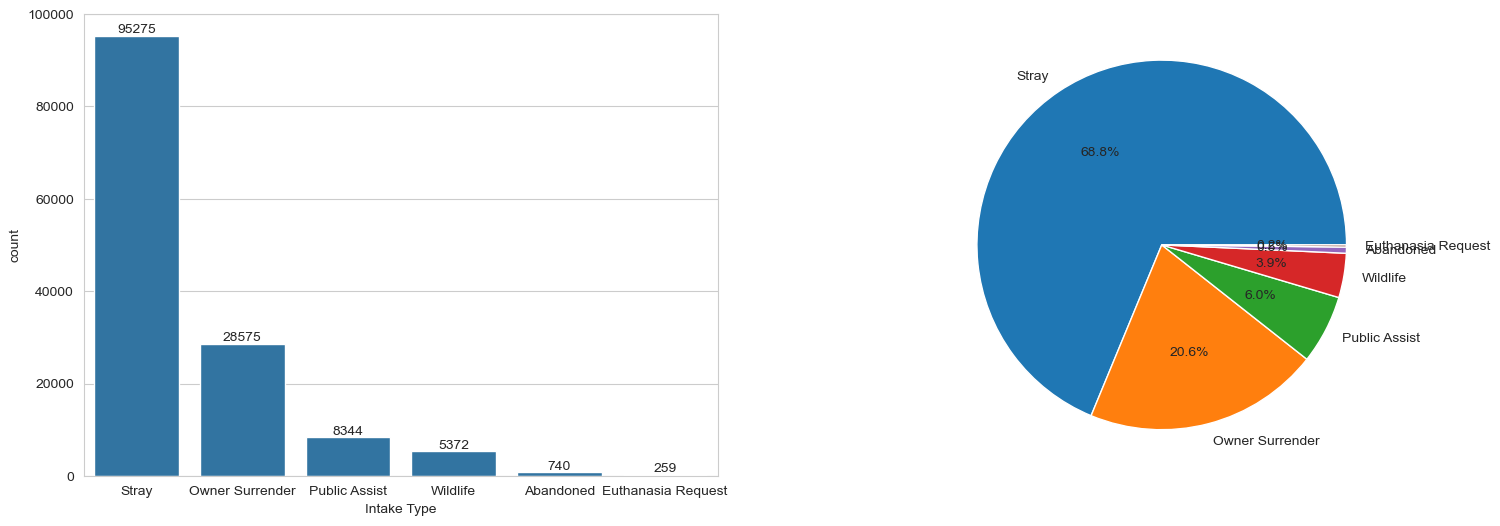

In [26]:
univariate_cat(intakes, 'Intake Type')

A total of six different types of animals adopted by the shelter: `Stray`, `Owner Surrender`, `Public Assist`, `Wildlife`, `Abandoned` and `Euthanasia Request`.
The charts show that the vast majority of animals admitted to the shelter are strays, their percentage of the shelter's intake is 68.8%, and the number of animals admitted is *95 275*.
Animals with an owner are second most, their percentage is 20.6%, the amount is *28 575*.

,Frequency,Relative frequency
Animal Type,,
Dog,78135,0.563887
Cat,52373,0.377967
Other,7372,0.053202
Bird,661,0.004770
Livestock,24,0.000173


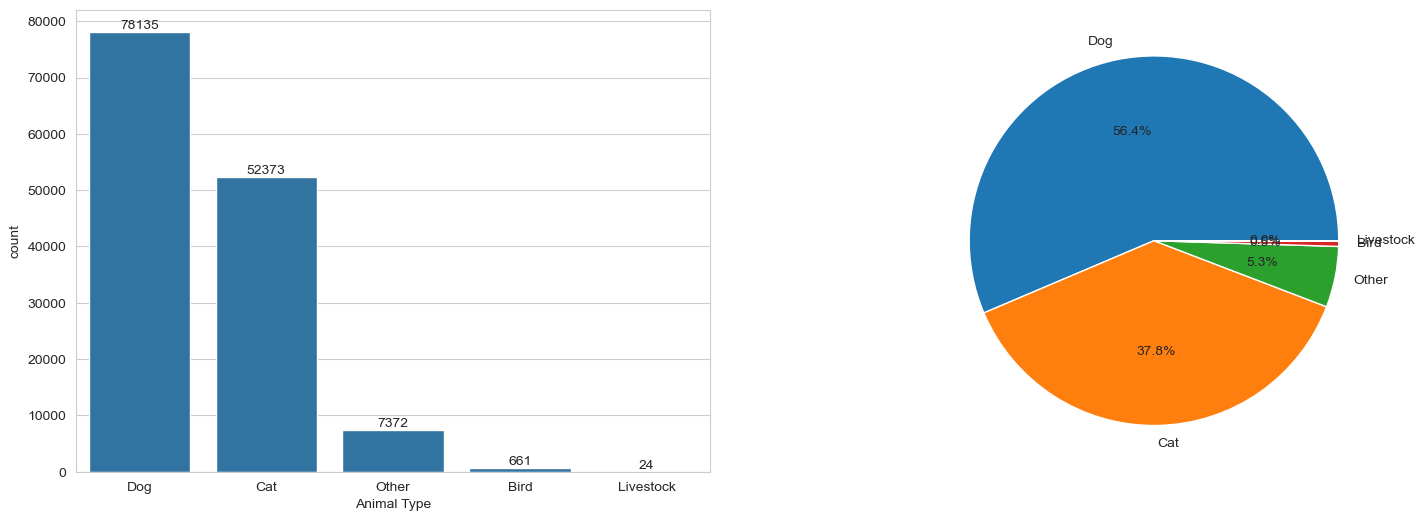

In [27]:
univariate_cat(intakes, 'Animal Type')

A total of five different breeds of animals adopted by the shelter: `Dog`, `Cat`, `Other`, `Bird` and `Livestock`.
The shelter takes in the most dogs, *78 135* of them.
Cats are second in the number of animals adopted with *52 373*.

,Frequency,Relative frequency
Sex upon Intake,,
Intact Male,45629,0.357880
Intact Female,43303,0.339637
Neutered Male,20835,0.163414
Spayed Female,17731,0.139069


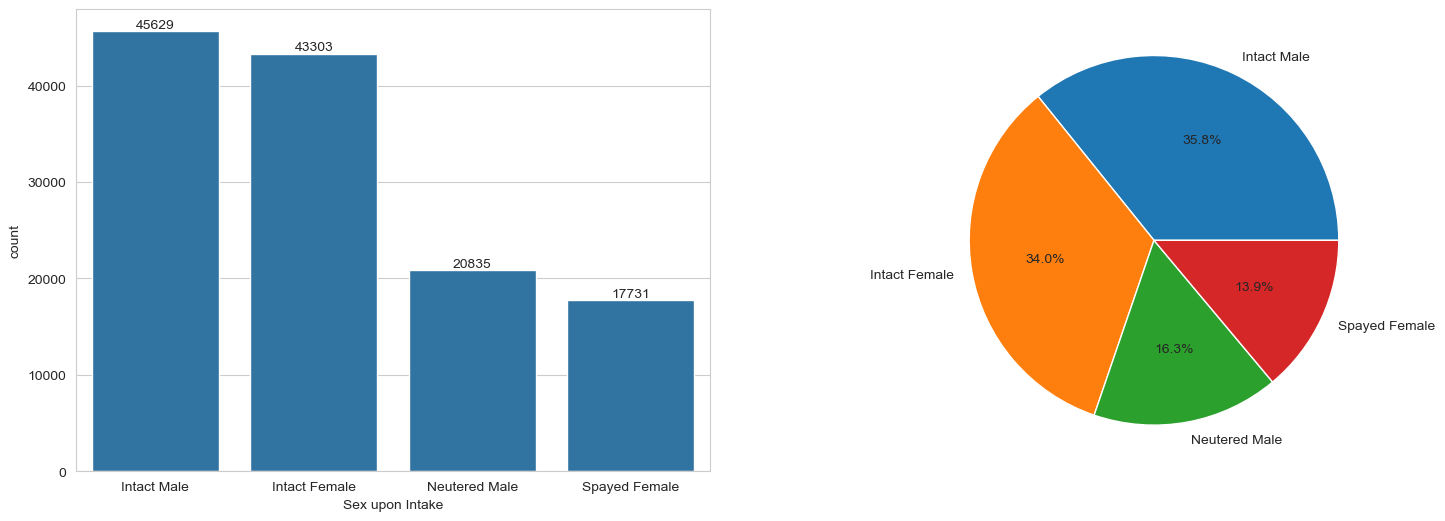

In [28]:
univariate_cat(intakes, 'Sex upon Intake')

A total of three different types of information about the fertility of an animal when it was admitted to the shelter: `Intact Male`, `Intact Female`, `Neutered Male` and `Sprayed Female`.
The graphs show that the majority of animals at the shelter are not neutered, non-neutered males and females have approximately the same percentage of 35.8% (male) vs 34.0% (female),
neutered males and females also have approximately equal percentages of 16.3% (male) vs 13.9% (female).

## Bivariate descriptive statistics

I selected two features `Intake Type` and `Intake Condition`, between which there is a correlation.
I describe their relationship using bivariate descriptive statistics.

In [29]:
# Bivariate descriptive statistics for categorical data
def bivariate_cat(df, categorical1, categorical2):
    frequency_table = pd.crosstab(df[categorical1], df[categorical2])

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,6))
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax1)

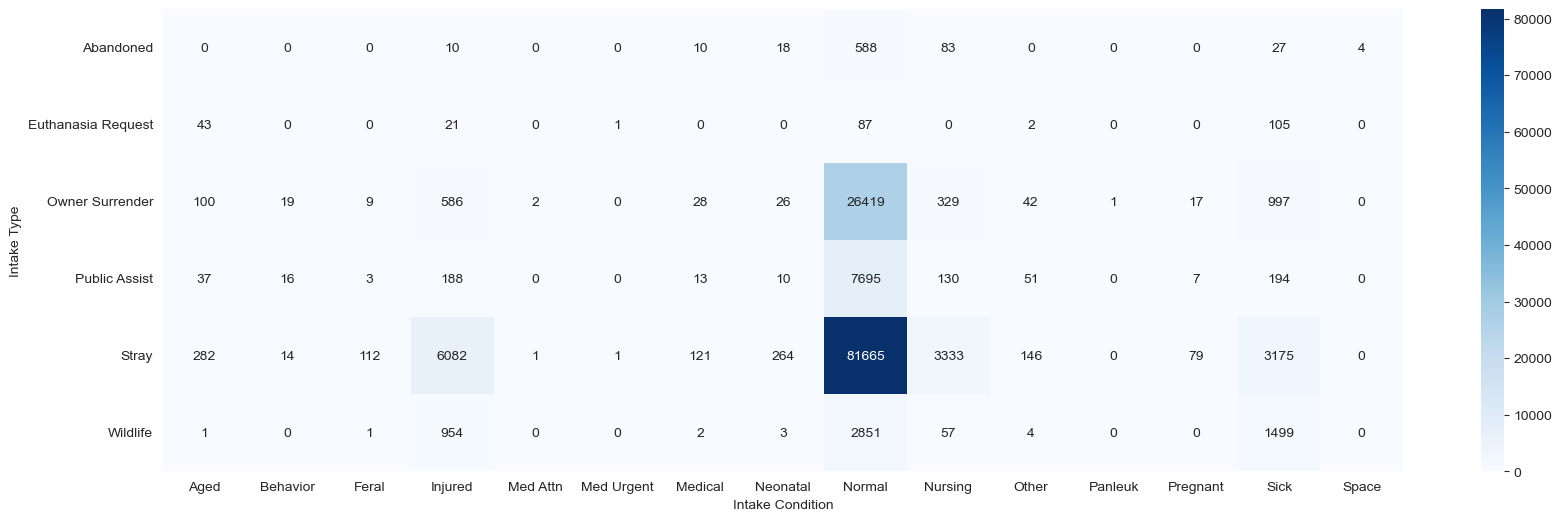

In [30]:
bivariate_cat(intakes, 'Intake Type', 'Intake Condition')

The chart shows that
   * *81 665* animals found on the street are in normal condition when they are taken to the shelter;
   * *26 419* animals taken from their owner are in normal condition;
   * *7 695* animals admitted to the shelter from Public Assist were in normal condition;
   * the majority of injured (`Injured` *6 082*), nursing (`Nursing` *3 333*) and sick (`Sick` *3 175*) animals were taken off the street (Stray).

## Questions asked

### Does the Outcome Type depend on the Income Type?

In [31]:
# remove duplicate IDs
uId_intakes = intakes.drop_duplicates(subset = 'Animal ID')
uId_outcomes = outcomes.drop_duplicates(subset = 'Animal ID')

In [32]:
# merge datasets intakes and outcomes based on Animal ID
intakes_merge_outcomes = uId_intakes.merge(uId_outcomes, how='inner', on='Animal ID')

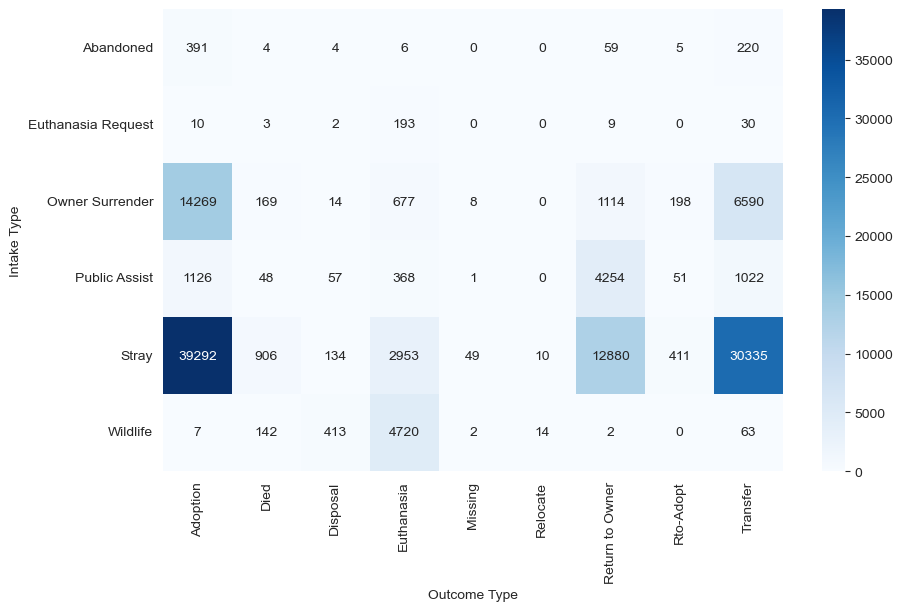

In [33]:
merged_t = pd.crosstab(intakes_merge_outcomes['Intake Type'], intakes_merge_outcomes['Outcome Type'])
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(merged_t, cmap='Blues', annot=True, fmt='g', ax=ax)

The graph shows that the correlation between the two features is not high.
It is possible to allocate the number of adopted homeless animals (`Stray`), there are *39 292*, compared to other ratios this correlation is quite high.
I can also highlight the number of transferred (`Transfer`) stray animals, the number is *30 335*.

### Does the age of the animal play a role in adoption?

In [34]:
# styling
sns.set_style("darkgrid")
palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

In [35]:
# selecting the Outcome Type 'Adoption' that interests me
adopted_animals = outcomes[outcomes['Outcome Type'] == 'Adoption'].copy()
adopted_animals['Outcome Type'] = 'Adoption'

In [36]:
#  Bivariate descriptive statistics
def bivariate_cat_cont(df, categorical, continuous):
    # number of unique categories
    n_categories = df[categorical].nunique()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

    # box plot
    box_plot = sns.boxplot(data=df, x=categorical, y=continuous, ax=ax1)
    medians = df.groupby(categorical)[continuous].median()

    # shift from median for display
    vertical_offset = df[continuous].max() * 0.015

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')

    # violin plot
    sns.violinplot(data=df, x=categorical, y=continuous, ax=ax2)

/var/folders/3f/31wd061j4kvc_mzd3wfvw8c00000gn/T/ipykernel_3496/2392829829.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')


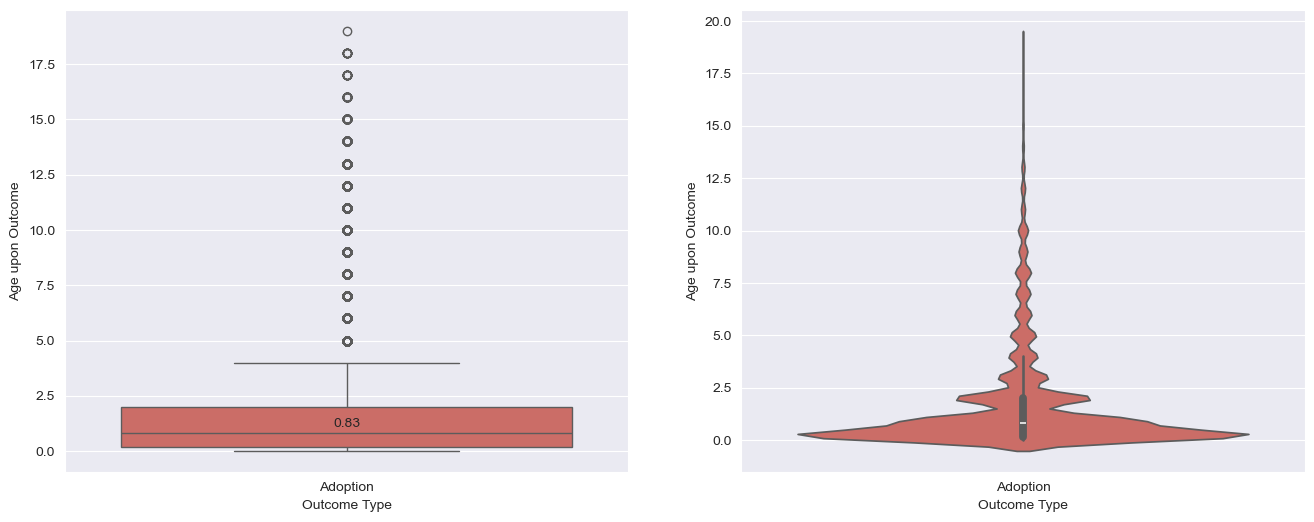

In [37]:
bivariate_cat_cont(adopted_animals, 'Outcome Type', 'Age upon Outcome')

The charts show that the age of the animal plays a role in the adoption decision.
Most people take home animals under 2.5 years of age. Of these, most are under one year old.

### Is the intake of animals constant throughout the year or are there periods with higher/lower loads?

In [38]:
in_months = intakes
in_months['Month'] = pd.DatetimeIndex(in_months['DateTime']).month

,Frequency,Relative frequency
Month,,
6,13419,0.096843
5,13395,0.096669
10,13111,0.094620
7,12331,0.088991
9,12047,0.086941
8,11860,0.085592
4,11251,0.081197
11,10993,0.079335
3,10944,0.078981


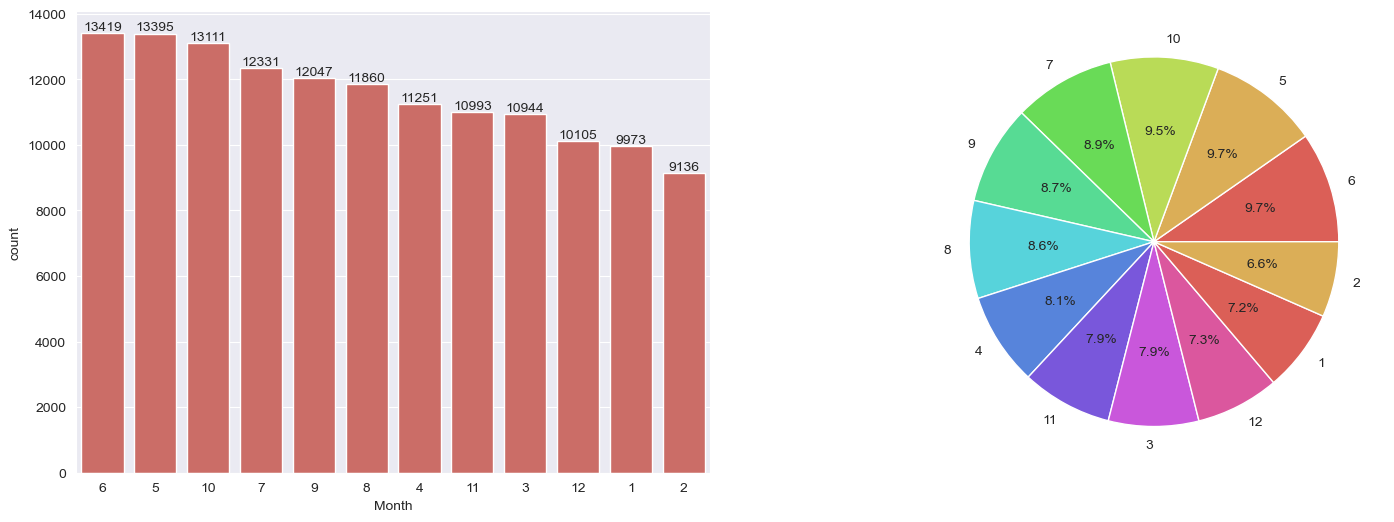

In [39]:
univariate_cat(in_months, 'Month')

There is no noticeable difference between the months. This means that during the year the number of animals admitted to the shelter is similar.
From the graph I can see the difference in the number of animals admitted between June (6th month), when the most animals were admitted, and February (2nd month), when the least animals were admitted.

### Does the breed of the animal play a role in Euthanasia?

In [40]:
# selecting the Outcome Type 'Euthanasia' that interests me
eutanasia_animals = outcomes[outcomes['Outcome Type'] == 'Euthanasia'].copy()
eutanasia_animals['Outcome Type'] = 'Euthanasia'

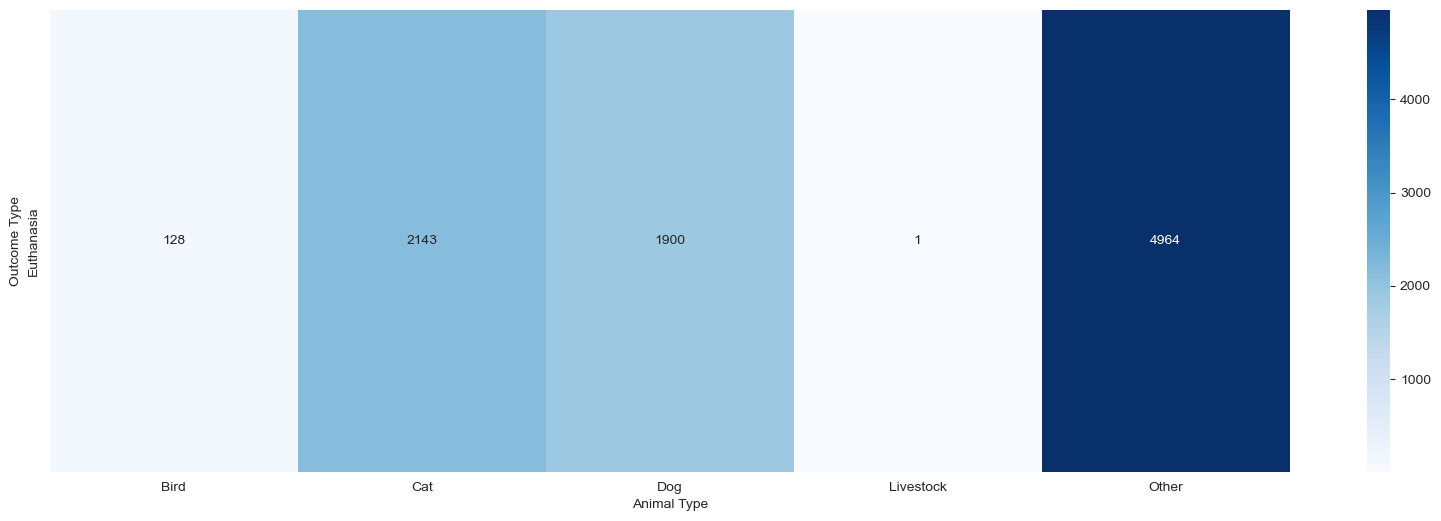

In [41]:
# Bivariate descriptive statistics for two categorical variables
bivariate_cat(eutanasia_animals, 'Outcome Type', 'Animal Type')

Of the designated breeds of animals, more cats were euthanized (*2 143*), and there are other breeds of animals (`Other`) without an explicit breed designation,
but it is not possible to say for certain from this. From the available data, there is no dependency that a particular breed will be euthanized more times than others.

### Age of cats after leaving the shelter

In [42]:
# Bivariate descriptive statistics for categorical and continuous variables
def bivariate_cat_cont_ds(df, categorical, continuous):
    # number of unique categories
    n_categories = df[categorical].nunique()
    fig, axes = plt.subplots(3, 2, figsize=(16,16))

    # box plot
    box_plot = sns.boxplot(data=df, x=categorical, y=continuous, ax=axes[0][0])
    medians = df.groupby(categorical)[continuous].median()

    # shift from median for display
    vertical_offset = df[continuous].max() * 0.015

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')

    # violin plot
    sns.violinplot(data=df, x=categorical, y=continuous, ax=axes[0][1])

    # histograms
    sns.histplot(
        data=df, x=continuous, hue=categorical, element='step',
        palette=palette[:n_categories], ax=axes[1][0]
    ).set(title='Histogram')

    sns.histplot(
        data=df, x=continuous, hue=categorical, multiple='stack',
        palette=palette[:n_categories], ax=axes[1][1]
    ).set(title='Stacked histogram')

    sns.histplot(
        data=df, x=continuous, hue=categorical, element='step', stat='probability',
        common_norm=False,  palette=palette[:n_categories], ax=axes[2][0]
    ).set(title='Normalized histogram')

    sns.histplot(
        data=df, x=continuous, hue=categorical, multiple='stack', stat='probability',
        common_norm=False, palette=palette[:n_categories], ax=axes[2][1]
    ).set(title='Normalized stacked histogram')

In [43]:
age_cats = outcomes[outcomes['Animal Type'] == 'Cat'].copy()
age_cats['Animal Type'] = 'Cat'

/var/folders/3f/31wd061j4kvc_mzd3wfvw8c00000gn/T/ipykernel_3496/386077523.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')


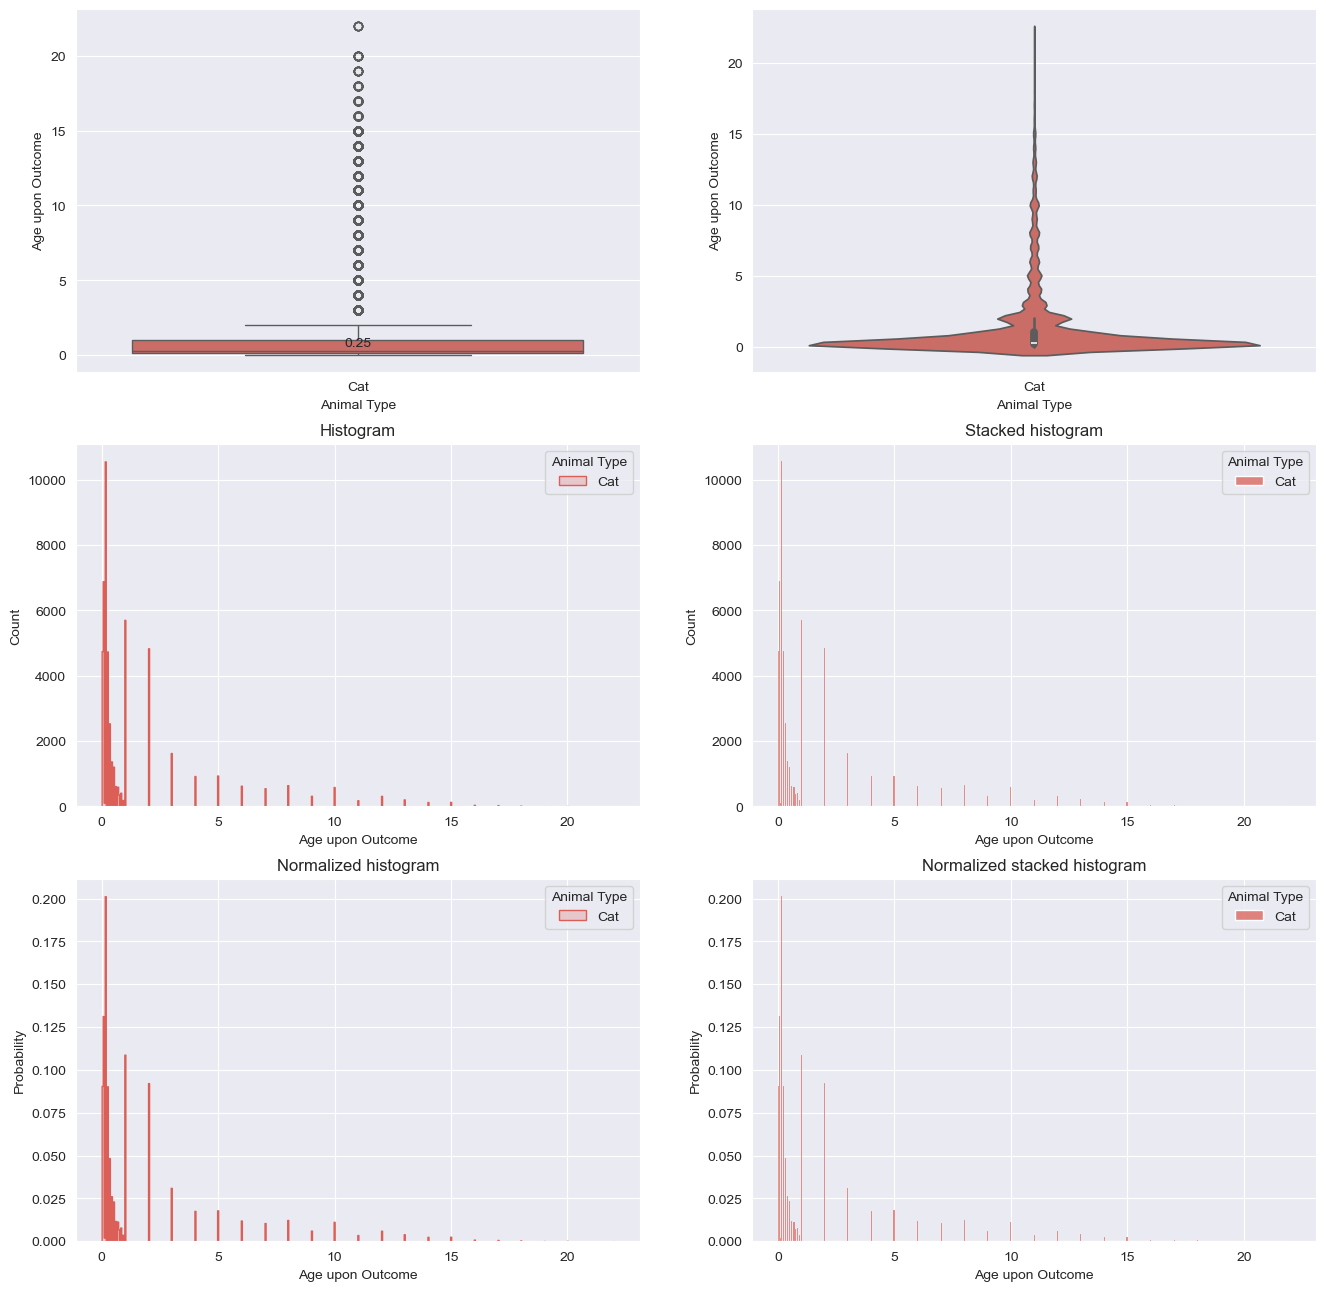

In [44]:
bivariate_cat_cont_ds(age_cats, 'Animal Type', 'Age upon Outcome')

The graphs show that the age of cats released from the shelter is in most cases between zero and six months.
The number of cats decreases as they get older.

### Does the fertility of animals depend on their fate after the shelter?

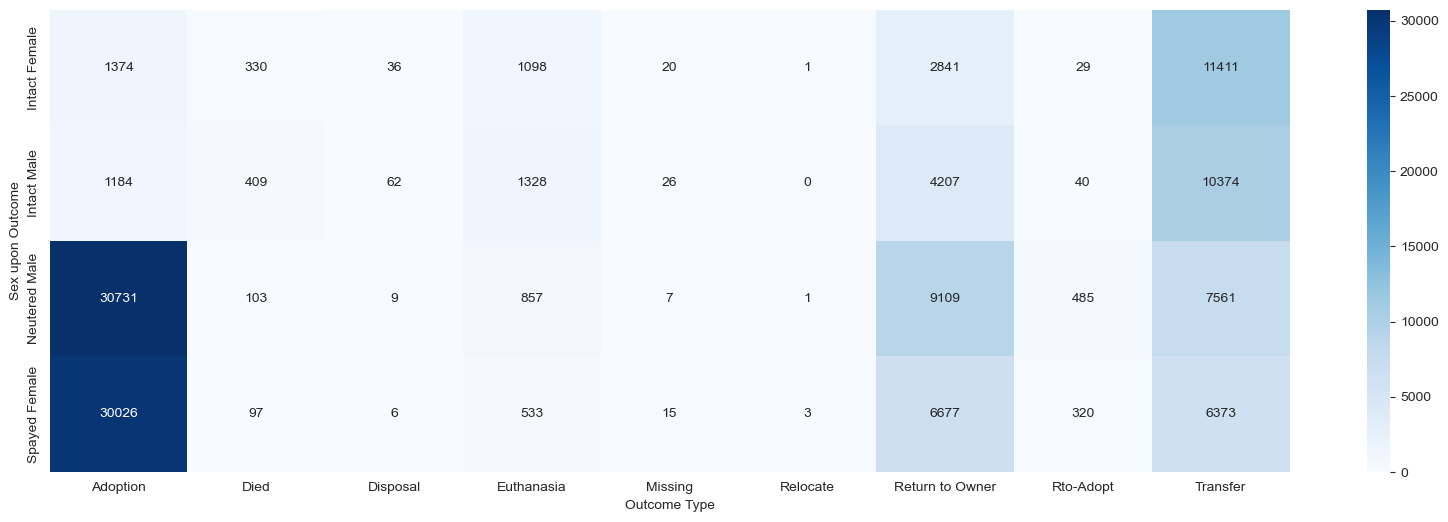

In [45]:
bivariate_cat(outcomes, 'Sex upon Outcome', 'Outcome Type')

The graph shows that more neutered (`Sprayed Female` and `Neutered Male`) animals are adopted than unneutered animals.
For other Outcome Types neutering of animals is of little significance.